## 1. Connection to SQL Server

In [25]:
#Se importan modulos y librerías
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
#Se crea la conexión a SQL Server
Server='GYOKU-PC\SQLEXPRESS'
Database='ahora12'
Driver='SQL Server'
Database_Con=f'mssql://@{Server}/{Database}?driver={Driver}'

engine = create_engine(Database_Con)
con= engine.connect()

## 2.A- Dataframe creation from table: "opyfacttable"

In [27]:
#Se crea un dataframe a partir de la tabla "opyfacttable" de la base datos SQL Server
df = pd.read_sql_query('select * from opyfacttable', con)

In [28]:
#Se cambian los tipos de datos
df[['mes_anio', 'provincia', 'rubro']] = df[['mes_anio', 'provincia', 'rubro']].astype('string')
df[['operaciones', 'facturacion']] = df[['operaciones', 'facturacion']].astype('int64')

In [29]:
df.dtypes

mes_anio       string
provincia      string
rubro          string
operaciones     int64
facturacion     int64
dtype: object

In [30]:
#Se corrige un error en la columna "facturacion" (números negativos se pasan a positivos)
df['facturacion'] = df['facturacion'].abs()

In [31]:
#Se exporta el dataframe a un nuevo archivo excel
df.to_excel('ahora12_2021_joinedtable.xlsx', 
              sheet_name='Ahora 12-2021')

In [32]:
#Se crea un dataframe con la suma de las operaciones y facturaciones por rubro
df_rubro = df.pivot_table(index='rubro', 
                          aggfunc='sum', 
                          values=['operaciones', 'facturacion'])

In [33]:
#Se ordenan los valores de mayor a menor teniendo como referencia la columna "facturacion"
df_rubro = df_rubro.sort_values(by='facturacion', ascending=False)

In [34]:
#Se exporta el dataframe a un nuevo archivo excel
df_rubro.to_excel('df-porrubro.xlsx', 
              sheet_name='Ahora 12-2021')

In [35]:
df_rubro

,facturacion,operaciones
rubro,,
Electrodomésticos,288042351189,14591827
Indumentaria,232001012991,29277883
Materiales para la construcción,93455081557,3555695
Turismo,56384176786,1790932
"Neumáticos, accesorios y repuestos",45719557008,1297384
Calzado y Marroquinería,42324435927,6163544
Muebles,39378884316,1490498
Sin clasificar,26098337678,2337797
Colchones,17394717570,463568


## 2.B- Dataframe creation from table:  "facturacion"

In [36]:
#Se crea un dataframe a partir de la tabla "facturacion" de la base datos SQL Server
df_fact = pd.read_sql_query('select * from facturacion', con)

In [37]:
df_fact.dtypes

id              object
anio           float64
mes            float64
mes_anio        object
provincia       object
rubro           object
facturacion    float64
dtype: object

In [38]:
#Se cambian los tipos de datos
df_fact['facturacion'] = df_fact['facturacion'].astype('int64')
df_fact[['id','anio','mes','mes_anio', 'provincia', 'rubro']] = df_fact[['id','anio','mes','mes_anio', 'provincia', 'rubro']].astype('string')

In [39]:
#Se crea un dataframe con la suma de las facturaciones por rubro
df_fact_rubro = df_fact.pivot_table(index='rubro', 
                          aggfunc='sum', 
                          values='facturacion')

In [40]:
#Se ordenan los valores de mayor a menor teniendo como referencia la columna "facturacion"
df_fact_rubro = df_fact_rubro.sort_values(by='facturacion', ascending=False)

In [41]:
df_fact_rubro

,facturacion
rubro,
Electrodomésticos,626219698307
Indumentaria,484392265885
Materiales para la construcción,225437354261
Calzado y Marroquinería,94364693516
Muebles,93517524912
Turismo,88364731833
"Neumáticos, accesorios y repuestos",71611761380
Sin clasificar,55315677660
Teléfonos Celulares 4G,54049530244


In [42]:
#Se exporta el dataframe a un nuevo archivo excel
df_fact_rubro.to_excel('df_fact_rubro.xlsx', 
              sheet_name='Ahora 12-2021')

In [43]:
#Se convierte el index en columna
df_fact_rubro.reset_index(inplace=True)

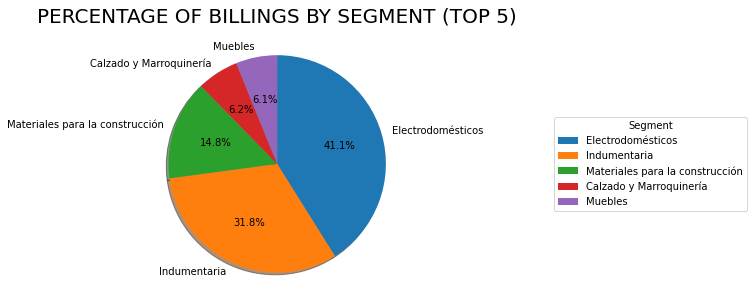

In [44]:
#Se genera un gráfico de torta mostrando el porcentaje de facturaciones por rubro
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(5)
fig.patch.set_facecolor('white')
plt.pie(df_fact_rubro['facturacion'].head(5), 
        labels=df_fact_rubro['rubro'].head(5), 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        counterclock=False,
        textprops=dict(color="k"))
plt.title(str.upper('Percentage of billings by segment (Top 5)'), fontsize=20)
plt.legend(df_fact_rubro['rubro'], 
           loc='center left', 
           bbox_to_anchor=(1.5, 0.5), 
           title='Segment')
plt.savefig('Ahora 12 - Top 5 - Percentage of billings by segment.png', facecolor=fig.get_facecolor(), transparent=False)
plt.show()

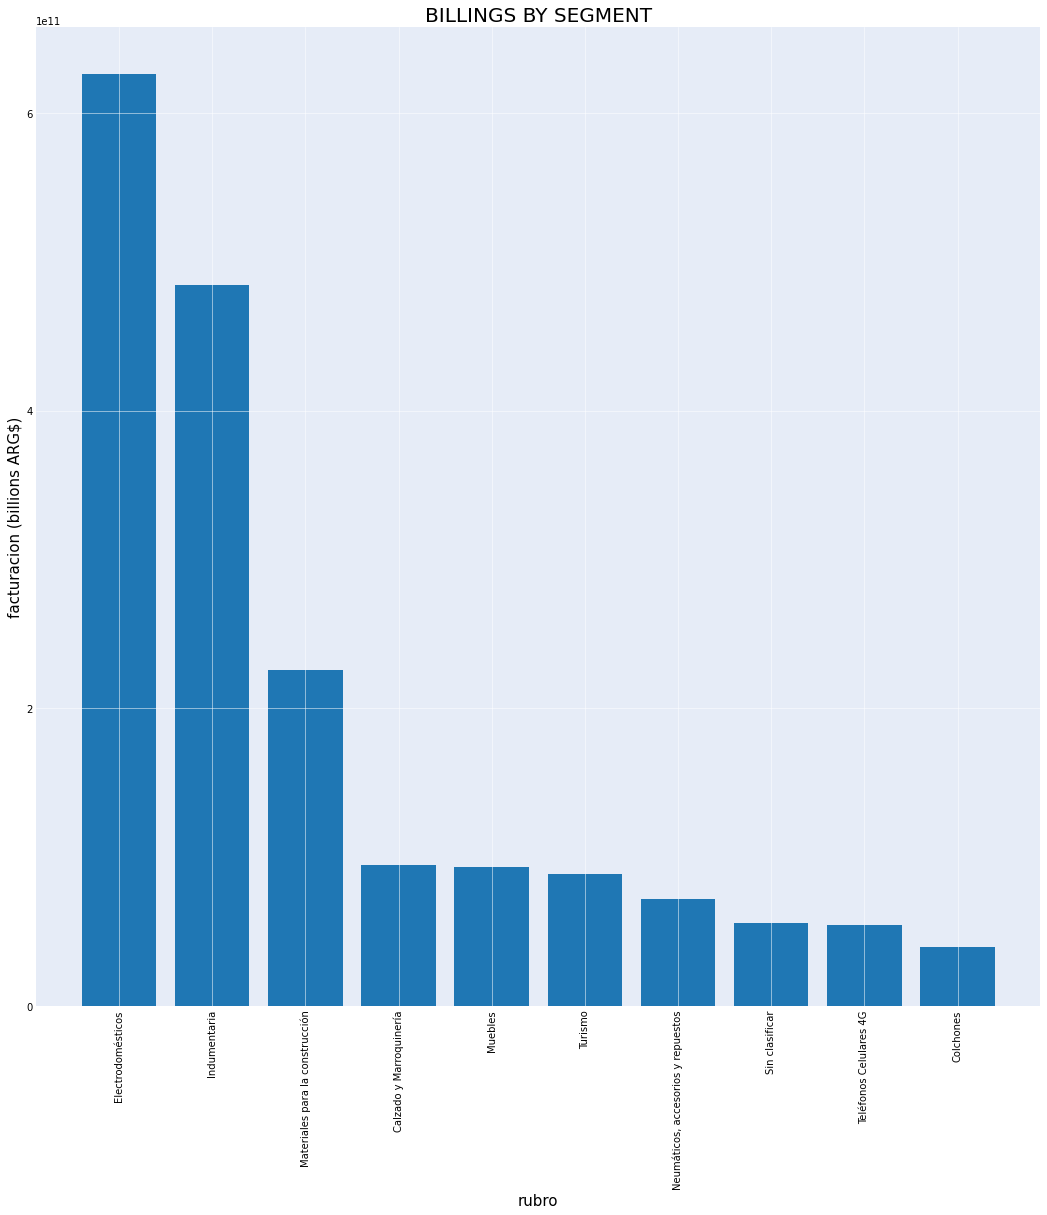

In [45]:
#Se genera un gráfico de barras de la facturación por rubro
# Styling of the figure
fig = plt.figure()
fig.set_figwidth(18)
fig.set_figheight(18)
fig.patch.set_facecolor('white')
plt.bar(df_fact_rubro['rubro'].head(10),df_fact_rubro['facturacion'].sort_values(ascending=False).head(10))
plt.title(str.upper(f'Billings by segment'), fontsize=20)
plt.xlabel("rubro", fontsize=15) 
plt.ylabel("facturacion (billions ARG$)", fontsize=15) 
# Styling of the plot
plt.grid(color = 'white', linewidth = 0.5)
plt.locator_params(axis='y', nbins=6)
# Styling of the axes
ax = plt.gca()
ax.set_facecolor('#e6ecf7')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.xticks(rotation='vertical')
plt.savefig('Ahora 12 - Billings by segment', transparent=False)
plt.show()

## 2.C- Dataframe creation from table:  "RankFactProv"

In [46]:
#Se crea un dataframe a partir de la tabla "RankFactProv" de la base datos SQL Server
df_rank_prov = pd.read_sql_query('select * from RankFactProv', con)

In [47]:
df_rank_prov

,provincia,facturacion,rank_id
0,BUENOS AIRES,1.369893e+10,1
1,BUENOS AIRES,1.002559e+10,2
2,BUENOS AIRES,1.000517e+10,3
3,CATAMARCA,1.127818e+08,1
4,CATAMARCA,1.090581e+08,2
...,...,...,...
70,TIERRA DEL FUEGO,3.346323e+08,2
71,TIERRA DEL FUEGO,3.083999e+08,3
72,TUCUMAN,8.467397e+08,1
73,TUCUMAN,6.624606e+08,2


In [48]:
#Se exporta el dataframe a un nuevo archivo excel
df_rank_prov.to_excel('df_rank_prov.xlsx', 
              sheet_name='Ahora 12- RankProv')

## 2.D- Dataframe creation from table:  "RankFactRubro"

In [49]:
#Se crea un dataframe a partir de la tabla "RankFactProv" de la base datos SQL Server
df_rank_rubro = pd.read_sql_query('select * from RankFactRubro', con)

In [50]:
df_rank_rubro

,rubro,facturacion,rank_id
0,"Alimentos, bebidas y productos de higiene pers...",4.638365e+08,1
1,"Alimentos, bebidas y productos de higiene pers...",4.379111e+08,2
2,"Alimentos, bebidas y productos de higiene pers...",3.894153e+08,3
3,Anteojos,4.320457e+08,1
4,Anteojos,4.058344e+08,2
...,...,...,...
94,Teléfonos Celulares 4G,3.546470e+09,2
95,Teléfonos Celulares 4G,3.517632e+09,3
96,Turismo,8.661370e+09,1
97,Turismo,5.929023e+09,2


In [51]:
#Se exporta el dataframe a un nuevo archivo excel
df_rank_rubro.to_excel('df_rank_rubro.xlsx', 
              sheet_name='Ahora 12- RankRubro')